In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

we have 32560 rows of data , 14 features and 1 label

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# DATA PRE PROCESSING

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [7]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

NO NULL VALUES PRESENT

In [8]:
cat_data = data.select_dtypes('object').columns.tolist()

In [9]:
cont_data = data.select_dtypes('int64').columns.tolist()

In [10]:
cat_data

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [11]:
cont_data

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [12]:
cat_data.remove('Income')

In [13]:
cat_data

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [14]:
data['Income'].nunique()

2

In [15]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Data Set is Imbalanced

# EDA

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
data['Income'] = le.fit_transform(data['Income'])

In [19]:
data['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

where <=50 = 0 and >50k = 1

In [20]:
for i in data[cat_data]:
    print(f'{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n')

9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

7
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

15
 Prof-specialty       4140
 Craft-repair         4099
 Ex

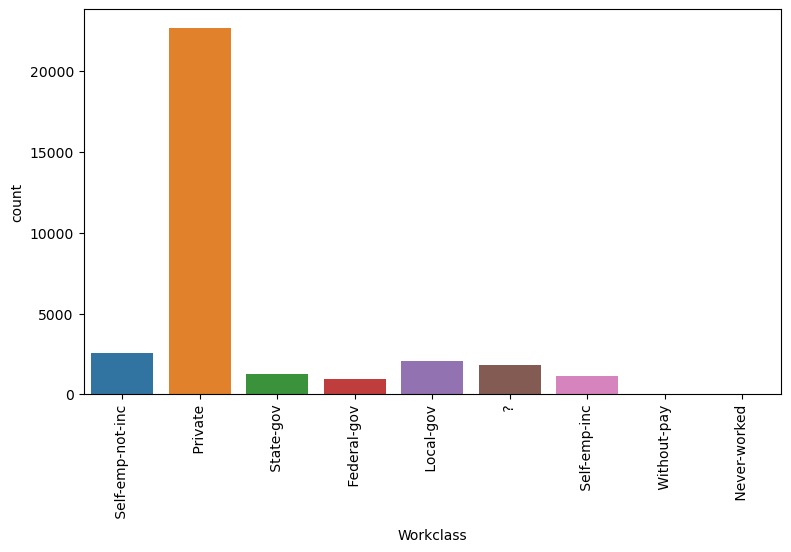

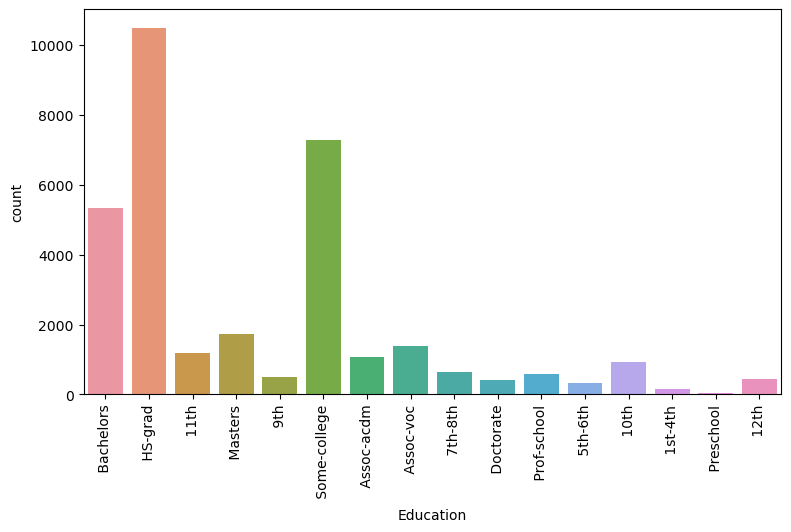

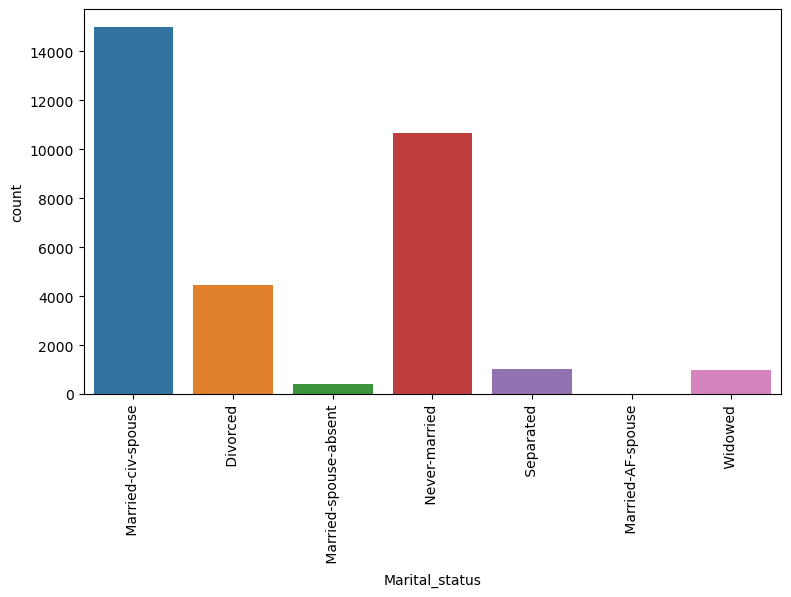

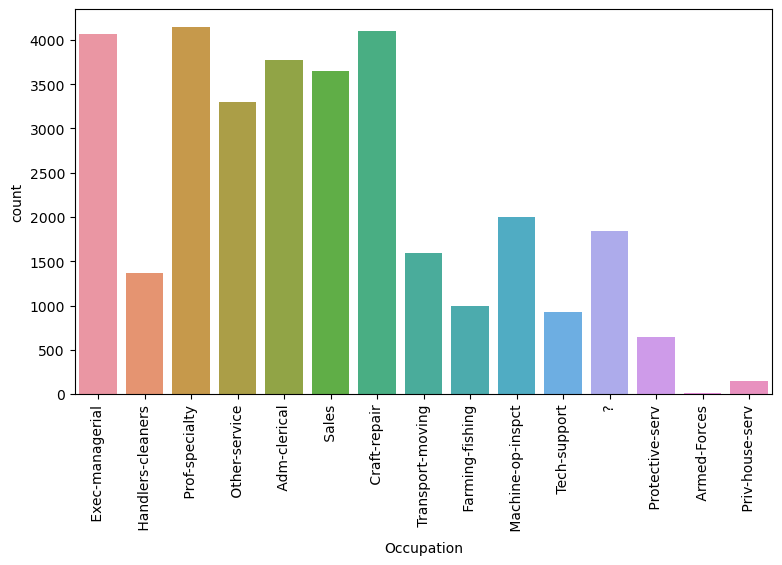

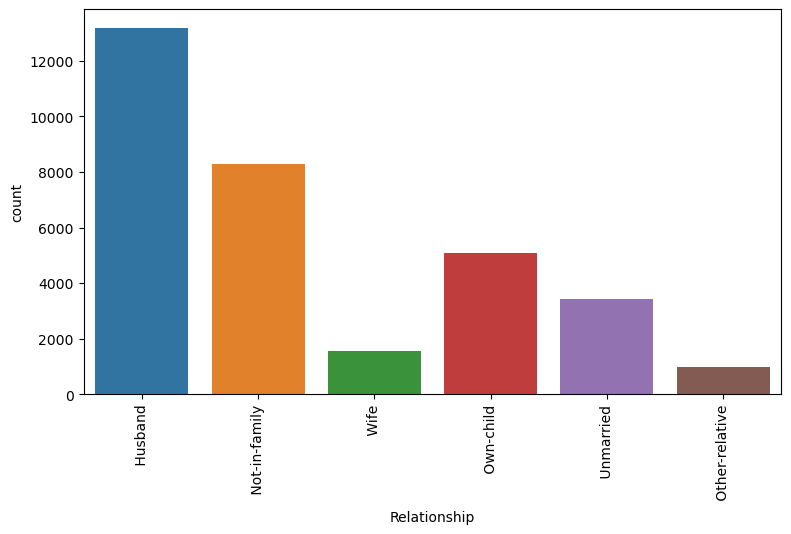

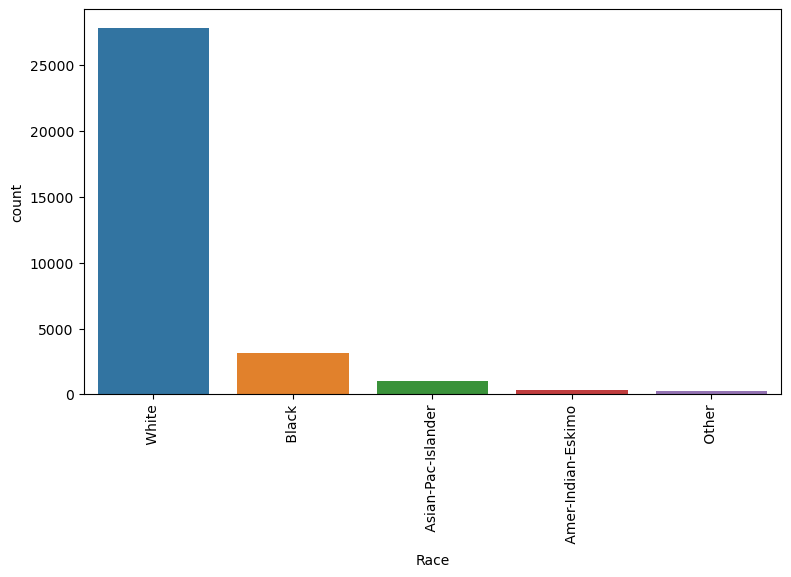

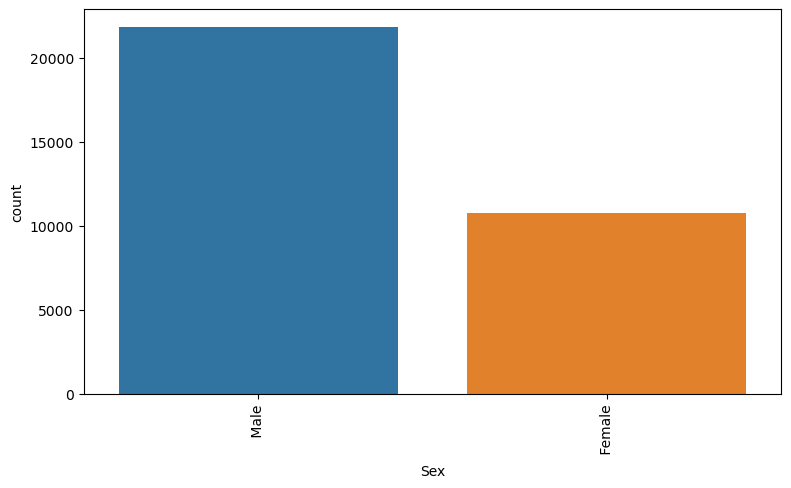

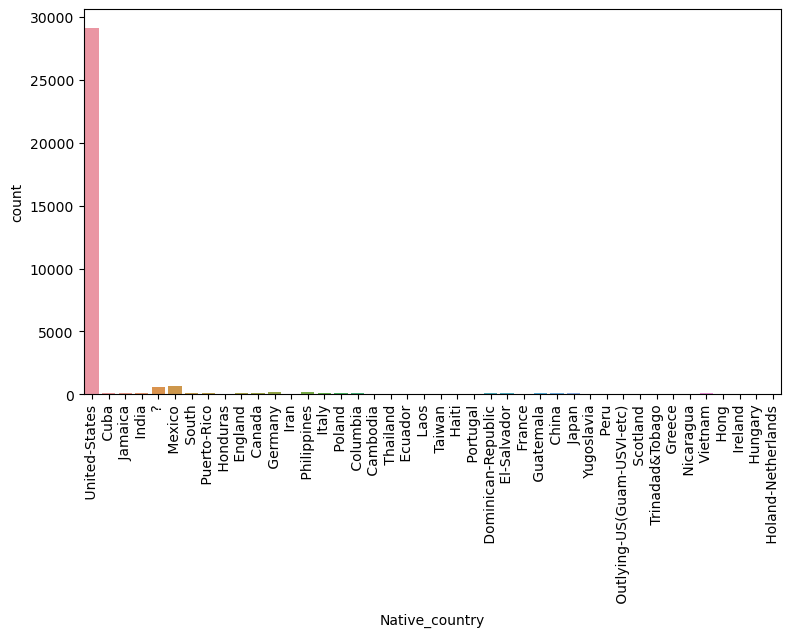

In [21]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

1. most of the workers belong to private workclass

2. most of the workers are higher secondary graduated

3. most of the workers are married

4. most worker belong to white race 

5. majority of the worker are Male 

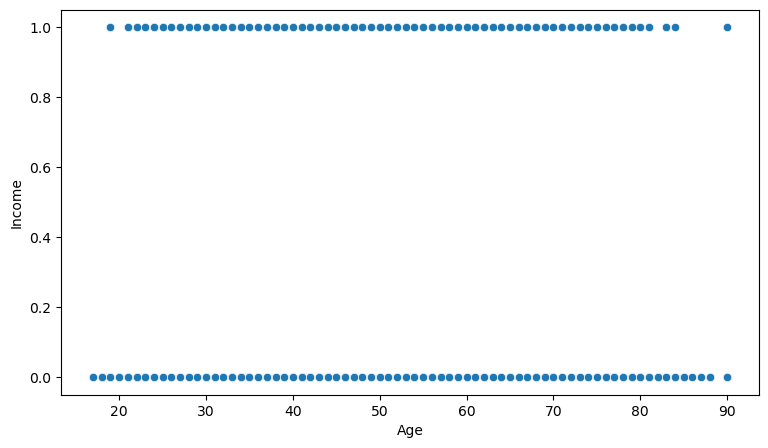

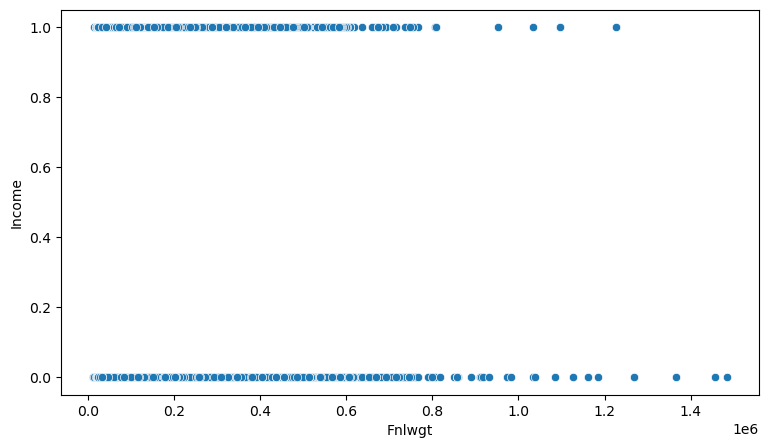

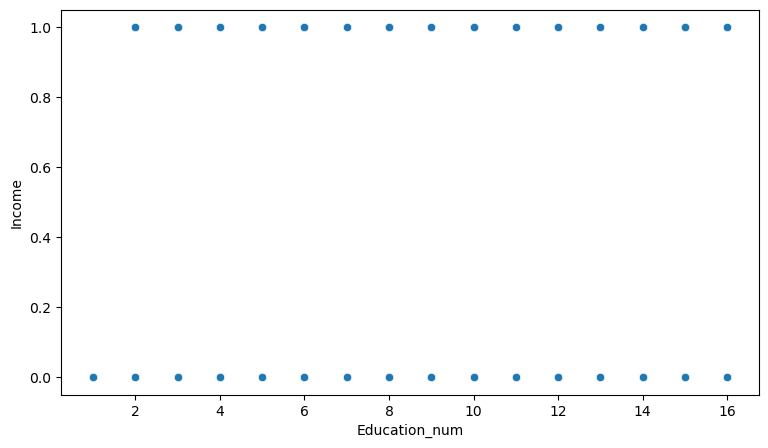

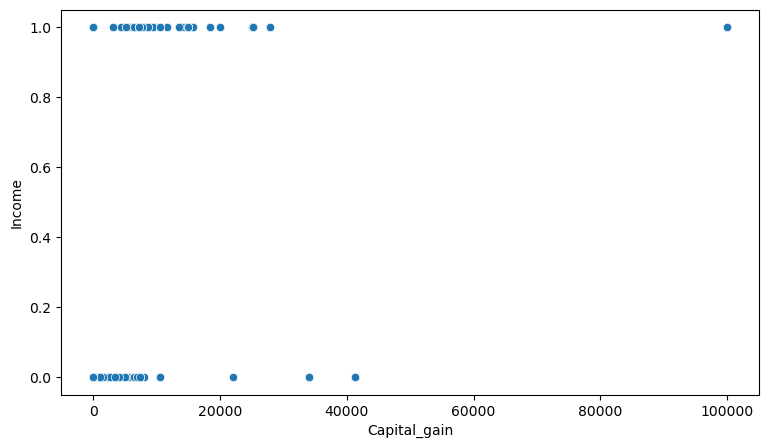

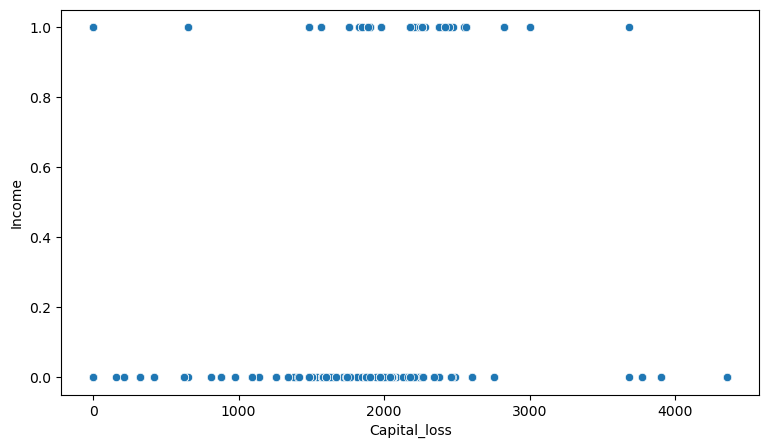

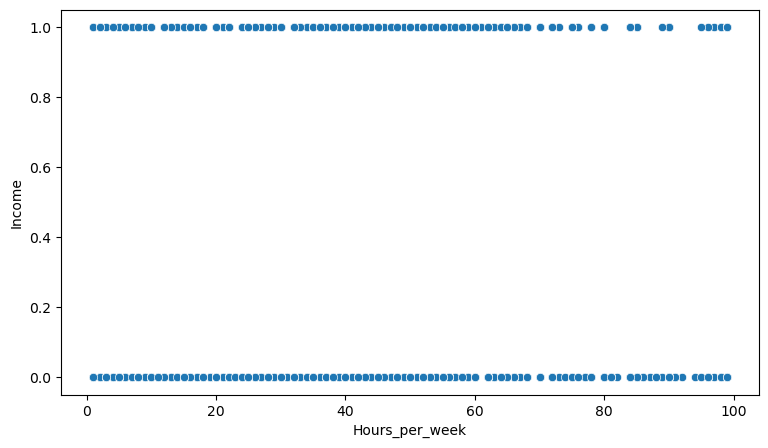

In [22]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Income'])
    plt.xlabel(i)
    plt.show()

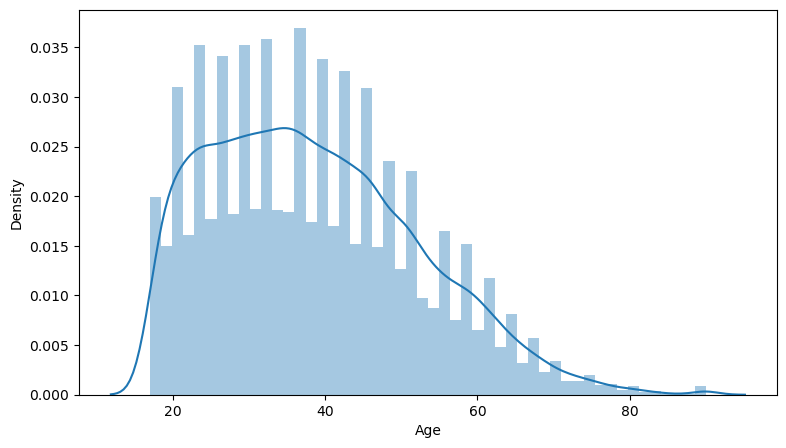

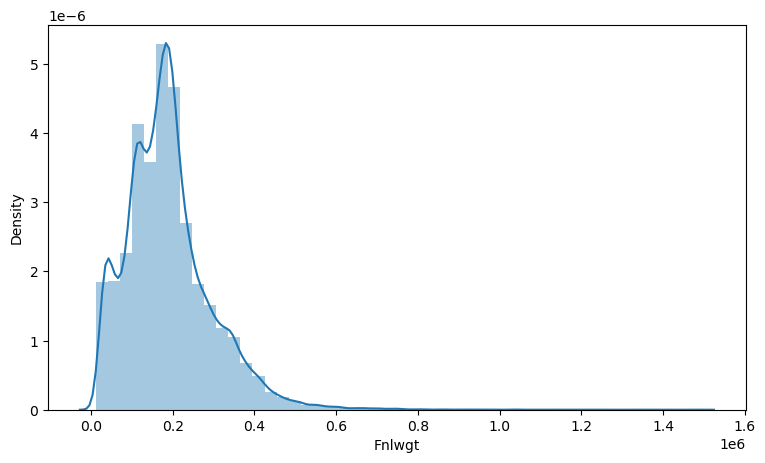

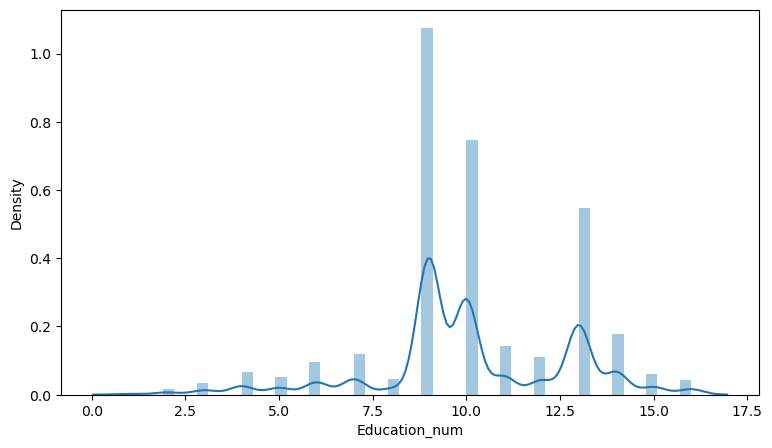

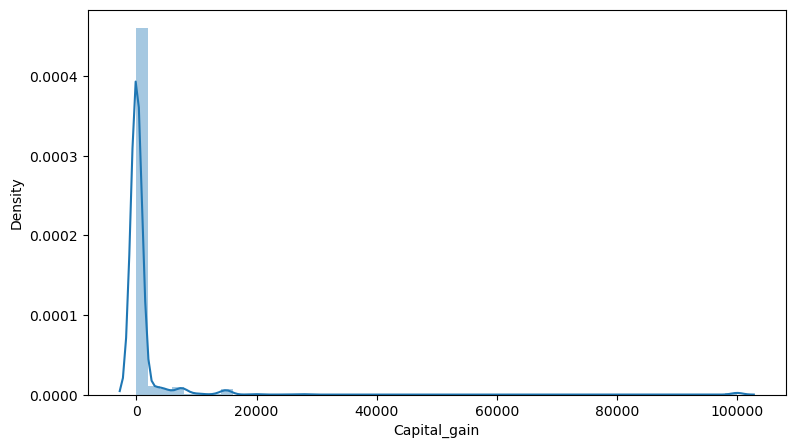

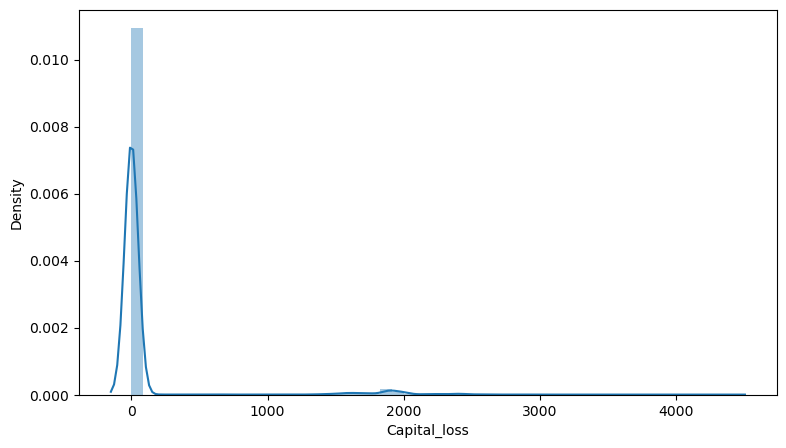

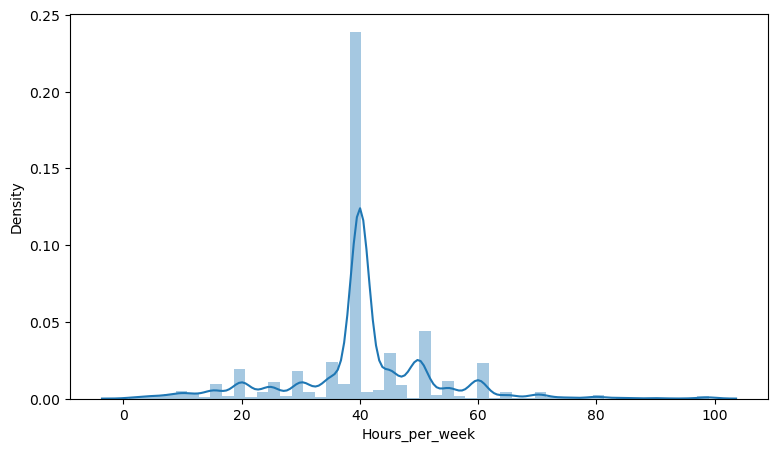

In [23]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

all of the features are not normally distributed and are highly skewed

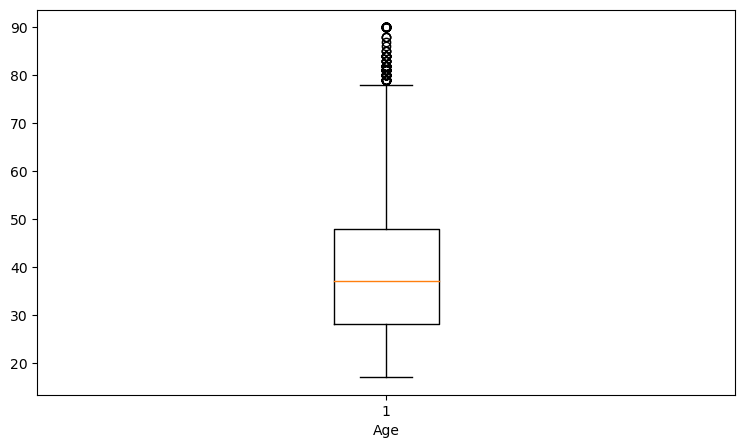

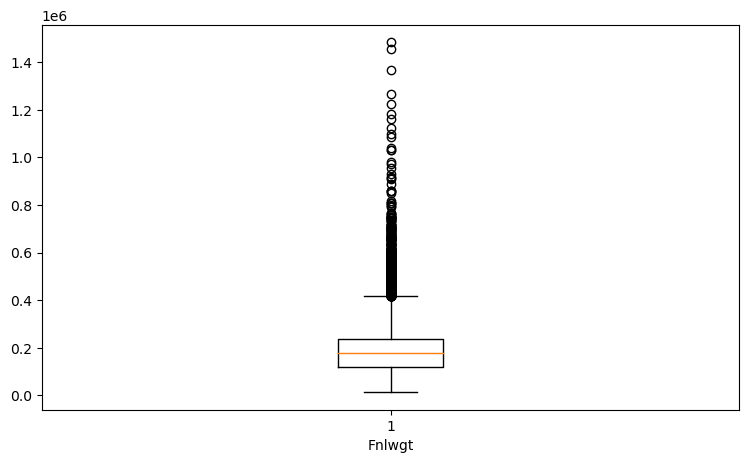

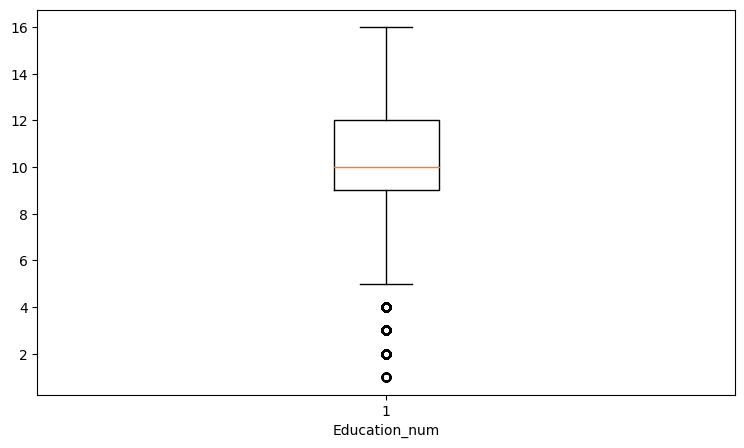

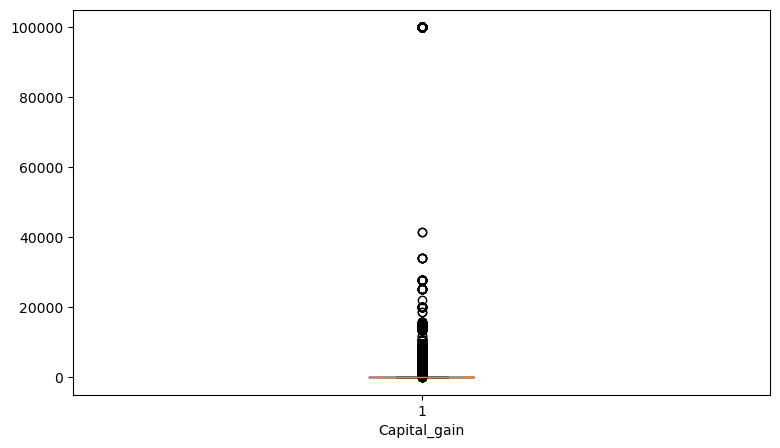

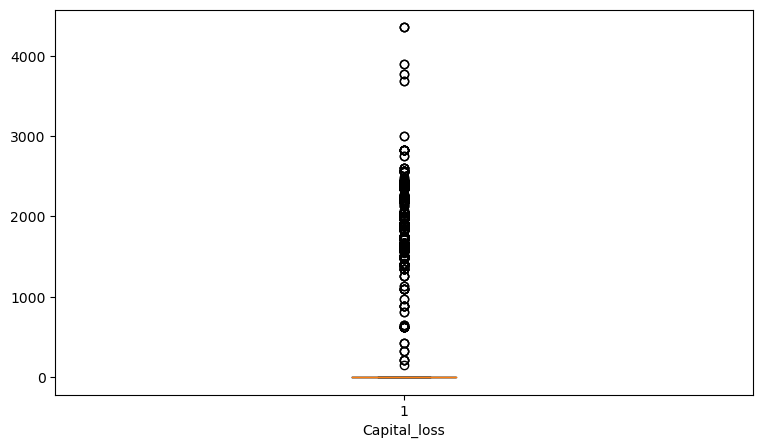

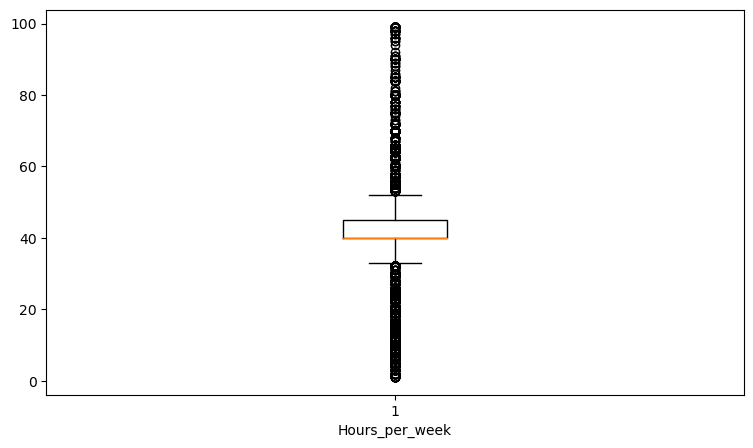

In [24]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()

all the features have outliers present

# DEALING WITH OUTLIERS

In [25]:
z = zscore(data[cont_data])

In [26]:
data = data[(z<3).all(axis=1)]

In [27]:
data.shape

(30106, 15)

In [28]:
data_loss = (32560-30106)/32560

In [29]:
data_loss

0.07536855036855036

# FEATURE SELECTION

In [30]:
data.corr()['Income'].sort_values()

Capital_loss     -0.016605
Fnlwgt           -0.011016
Hours_per_week    0.228892
Age               0.234856
Education_num     0.316917
Capital_gain      0.342867
Income            1.000000
Name: Income, dtype: float64

capital_loss and Fnlwgt have very less corelation with label so we can drop them

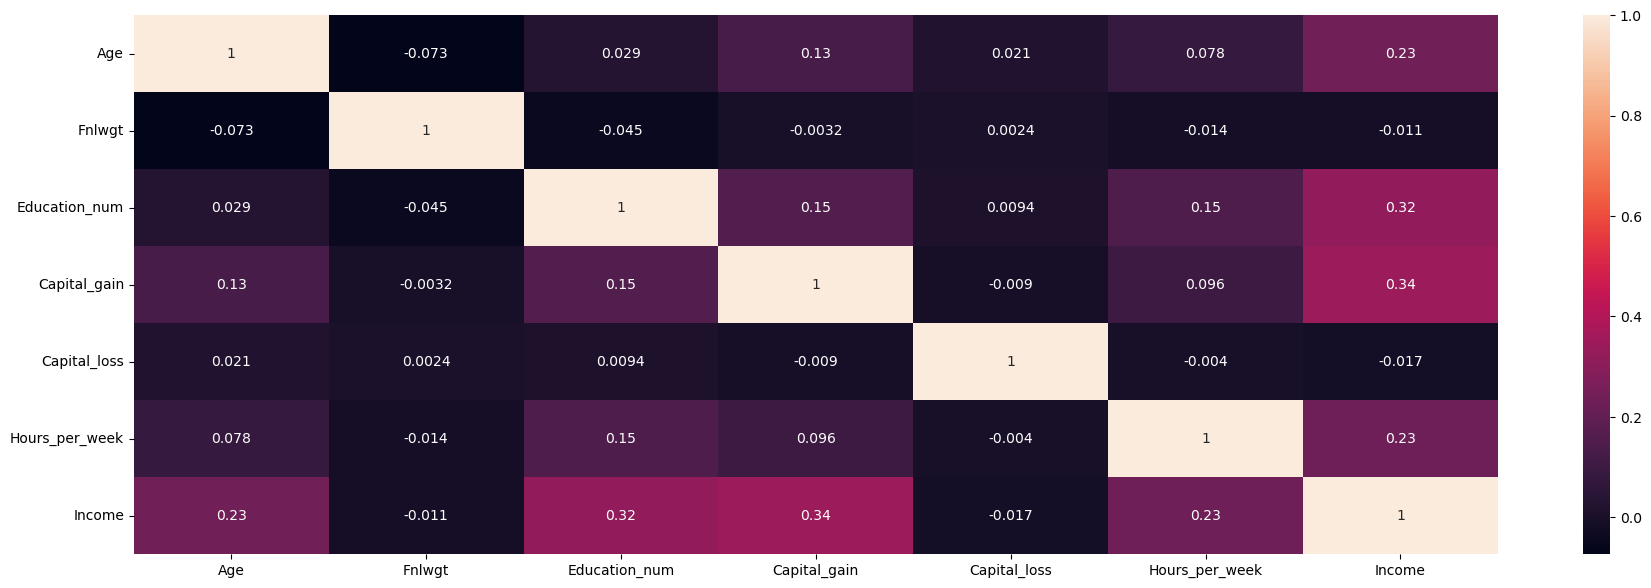

In [31]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [32]:
data.drop(['Capital_loss','Fnlwgt'],axis=1,inplace=True)

In [33]:
cont_data.remove('Fnlwgt')

In [34]:
cont_data.remove('Capital_loss')

# Scaling

In [35]:
data.skew().sort_values()

Hours_per_week   -0.406818
Education_num    -0.323823
Age               0.493674
Income            1.341286
Capital_gain      4.961554
dtype: float64

In [36]:
pt = PowerTransformer()

In [37]:
ss = StandardScaler()

In [38]:
x = data.drop('Income',axis=1)

y = data['Income']

In [39]:
dd = pd.get_dummies(x[cat_data])

In [40]:
x = pd.concat([x,dd],axis=1)

In [41]:
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,1,0,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,0,0,0,0,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
x.drop(cat_data,axis=1,inplace=True)

In [43]:
x.head()

,Age,Education_num,Capital_gain,Hours_per_week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,13,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,7,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,13,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=666)

In [45]:
x_train[cont_data] = pt.fit_transform(x_train[cont_data])

In [46]:
x_test[cont_data] = pt.transform(x_test[cont_data])

# BALANCING DATASET

In [47]:
#sm = SMOTE()

In [48]:
#x_train,y_train = sm.fit_resample(x_train,y_train)

In [49]:
#y_train.value_counts()

# LR

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
pred1 = lr.predict(x_train)

In [53]:
pred2 = lr.predict(x_test)

In [54]:
accuracy_score(y_train,pred1)

0.8499003487792726

In [55]:
accuracy_score(y_test,pred2)

0.8454001992693457

In [56]:
print(confusion_matrix(y_test,pred2))

[[4366  305]
 [ 626  725]]


In [57]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4671
           1       0.70      0.54      0.61      1351

    accuracy                           0.85      6022
   macro avg       0.79      0.74      0.76      6022
weighted avg       0.84      0.85      0.84      6022



In [58]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.8451472983051515

In [59]:
roc_auc_score(y_test,pred2)

0.7356715079468082

# KNN

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
pred3 = knn.predict(x_train)

In [63]:
pred4 = knn.predict(x_test)

In [64]:
accuracy_score(y_train,pred3)

0.8791728948679621

In [65]:
accuracy_score(y_test,pred4)

0.8317834606443042

In [66]:
print(confusion_matrix(y_test,pred4))

[[4231  440]
 [ 573  778]]


In [67]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4671
           1       0.64      0.58      0.61      1351

    accuracy                           0.83      6022
   macro avg       0.76      0.74      0.75      6022
weighted avg       0.83      0.83      0.83      6022



In [68]:
cv = cross_val_score(knn,x,y)

cv_mean = cv.mean()

cv_mean

0.8409621235451189

In [69]:
roc_auc_score(y_test,pred4)

0.7408357408207659

# DT

In [70]:
dt = DecisionTreeClassifier()

In [71]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
pred5 = dt.predict(x_train)

In [73]:
pred6 = dt.predict(x_test)

In [74]:
accuracy_score(y_train,pred5)

0.977744560704202

In [75]:
accuracy_score(y_test,pred6)

0.8178346064430422

In [76]:
print(confusion_matrix(y_test,pred6))

[[4166  505]
 [ 592  759]]


In [77]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4671
           1       0.60      0.56      0.58      1351

    accuracy                           0.82      6022
   macro avg       0.74      0.73      0.73      6022
weighted avg       0.81      0.82      0.82      6022



In [78]:
cv = cross_val_score(dt,x,y)

cv_mean = cv.mean()

cv_mean

0.8155516855623937

In [79]:
roc_auc_score(y_test,pred6)

0.7268460876685142

# RF

In [80]:
rf = RandomForestClassifier()

In [81]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
pred7 = rf.predict(x_train)

In [83]:
pred8 = rf.predict(x_test)

In [84]:
accuracy_score(y_train,pred7)

0.9777030393622322

In [85]:
accuracy_score(y_test,pred8)

0.8439056791763534

In [86]:
print(confusion_matrix(y_test,pred8))

[[4313  358]
 [ 582  769]]


In [87]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4671
           1       0.68      0.57      0.62      1351

    accuracy                           0.84      6022
   macro avg       0.78      0.75      0.76      6022
weighted avg       0.84      0.84      0.84      6022



In [88]:
cv = cross_val_score(rf,x,y)

cv_mean = cv.mean()

cv_mean

0.8449478248691298

In [89]:
roc_auc_score(y_test,pred8)

0.7462824384864578

# ADA

In [90]:
ada = AdaBoostClassifier()

In [91]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [92]:
pred9 = ada.predict(x_train)

In [93]:
pred10 = ada.predict(x_test)

In [94]:
accuracy_score(y_train,pred9)

0.8611526324530809

In [95]:
accuracy_score(y_test,pred10)

0.8576884755895051

In [96]:
print(confusion_matrix(y_test,pred10))

[[4434  237]
 [ 620  731]]


In [97]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4671
           1       0.76      0.54      0.63      1351

    accuracy                           0.86      6022
   macro avg       0.82      0.75      0.77      6022
weighted avg       0.85      0.86      0.85      6022



In [98]:
cv = cross_val_score(ada,x,y)

cv_mean = cv.mean()

cv_mean

0.8610577690802218

In [99]:
roc_auc_score(y_test,pred10)

0.7451710405527532

# GBDT

In [100]:
gb = GradientBoostingClassifier()

In [101]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
pred11 = gb.predict(x_train)

In [103]:
pred12 = gb.predict(x_test)

In [104]:
accuracy_score(y_train,pred11)

0.8676714831423351

In [105]:
accuracy_score(y_test,pred12)

0.861341746927931

In [106]:
print(confusion_matrix(y_test,pred12))

[[4450  221]
 [ 614  737]]


In [107]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4671
           1       0.77      0.55      0.64      1351

    accuracy                           0.86      6022
   macro avg       0.82      0.75      0.78      6022
weighted avg       0.85      0.86      0.85      6022



In [108]:
cv = cross_val_score(gb,x,y)

cv_mean = cv.mean()

cv_mean

0.8641800912570423

In [109]:
roc_auc_score(y_test,pred12)

0.749104313257178

# XGBOOSt

In [110]:
xg = XGBClassifier()

In [111]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [112]:
pred13 = xg.predict(x_train)

In [113]:
pred14 = xg.predict(x_test)

In [114]:
accuracy_score(y_train,pred13)

0.8912140840391961

In [115]:
accuracy_score(y_test,pred14)

0.8684822318166722

In [116]:
print(confusion_matrix(y_test,pred14))

[[4406  265]
 [ 527  824]]


In [117]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4671
           1       0.76      0.61      0.68      1351

    accuracy                           0.87      6022
   macro avg       0.82      0.78      0.80      6022
weighted avg       0.86      0.87      0.86      6022



In [118]:
roc_auc_score(y_test,pred14)

0.7765927726094248

# SVM

In [119]:
svm = SVC()

In [120]:
svm.fit(x_train,y_train)

SVC()

In [121]:
pred15 = svm.predict(x_train)

In [122]:
pred16 = svm.predict(x_test)

In [123]:
accuracy_score(y_train,pred15)

0.8584952665670155

In [124]:
accuracy_score(y_test,pred16)

0.8472268349385587

In [125]:
print(confusion_matrix(y_test,pred16))

[[4420  251]
 [ 669  682]]


In [126]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4671
           1       0.73      0.50      0.60      1351

    accuracy                           0.85      6022
   macro avg       0.80      0.73      0.75      6022
weighted avg       0.84      0.85      0.84      6022



In [127]:
roc_auc_score(y_test,pred16)

0.7255377170918218

as  we can see all the models are biased towards (0) as we have classes imbalanced so now trying different models with classes balanced

# BALANCING DATASET

In [128]:
sm = SMOTE()

In [129]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [130]:
y_train.value_counts()

0    18766
1    18766
Name: Income, dtype: int64

# LR

In [131]:
lr = LogisticRegression()

In [132]:
lr.fit(x_train,y_train)

LogisticRegression()

In [133]:
pred1 = lr.predict(x_train)

In [134]:
pred2 = lr.predict(x_test)

In [135]:
accuracy_score(y_train,pred1)

0.8619844399445806

In [136]:
accuracy_score(y_test,pred2)

0.8239787446031219

In [137]:
a1 = accuracy_score(y_train,pred1)

In [138]:
a2 = accuracy_score(y_test,pred2)

In [139]:
print(confusion_matrix(y_test,pred2))

[[3912  759]
 [ 301 1050]]


In [140]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4671
           1       0.58      0.78      0.66      1351

    accuracy                           0.82      6022
   macro avg       0.75      0.81      0.77      6022
weighted avg       0.85      0.82      0.83      6022



In [141]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8451472983051515

In [142]:
roc_auc_score(y_test,pred2)

0.8073550503991668

# KNN

In [143]:
knn = KNeighborsClassifier()

In [144]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [145]:
pred3 = knn.predict(x_train)

In [146]:
pred4 = knn.predict(x_test)

In [147]:
accuracy_score(y_train,pred3)

0.8967547692635618

In [148]:
accuracy_score(y_test,pred4)

0.7887744935237463

In [149]:
a4 = accuracy_score(y_train,pred3)

In [150]:
a5 = accuracy_score(y_test,pred4)

In [151]:
print(confusion_matrix(y_test,pred4))

[[3711  960]
 [ 312 1039]]


In [152]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4671
           1       0.52      0.77      0.62      1351

    accuracy                           0.79      6022
   macro avg       0.72      0.78      0.74      6022
weighted avg       0.83      0.79      0.80      6022



In [153]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.8409621235451189

In [154]:
roc_auc_score(y_test,pred4)

0.7817682565353954

# DT

In [155]:
dt = DecisionTreeClassifier()

In [156]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [157]:
pred5 = dt.predict(x_train)

In [158]:
pred6 = dt.predict(x_test)

In [159]:
accuracy_score(y_train,pred5)

0.984626452094213

In [160]:
accuracy_score(y_test,pred6)

0.8045499833942212

In [161]:
a7 = accuracy_score(y_train,pred5)

In [162]:
a8 = accuracy_score(y_test,pred6)

In [163]:
print(confusion_matrix(y_test,pred6))

[[4053  618]
 [ 559  792]]


In [164]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4671
           1       0.56      0.59      0.57      1351

    accuracy                           0.80      6022
   macro avg       0.72      0.73      0.72      6022
weighted avg       0.81      0.80      0.81      6022



In [165]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.8169135690311409

In [166]:
roc_auc_score(y_test,pred6)

0.7269633521542833

# RF

In [167]:
rf = RandomForestClassifier()

In [168]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [169]:
pred7 = rf.predict(x_train)

In [170]:
pred8 = rf.predict(x_test)

In [171]:
accuracy_score(y_train,pred7)

0.9845998081637003

In [172]:
accuracy_score(y_test,pred8)

0.8410826967784789

In [173]:
a10 = accuracy_score(y_train,pred7)

In [174]:
a11 = accuracy_score(y_test,pred8)

In [175]:
print(confusion_matrix(y_test,pred8))

[[4147  524]
 [ 433  918]]


In [176]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4671
           1       0.64      0.68      0.66      1351

    accuracy                           0.84      6022
   macro avg       0.77      0.78      0.78      6022
weighted avg       0.85      0.84      0.84      6022



In [177]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8441173759659193

In [178]:
roc_auc_score(y_test,pred8)

0.7836575617132088

# ADA

In [179]:
ada = AdaBoostClassifier()

In [180]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [181]:
pred9 = ada.predict(x_train)

In [182]:
pred10 = ada.predict(x_test)

In [183]:
accuracy_score(y_train,pred9)

0.8502344665885111

In [184]:
accuracy_score(y_test,pred10)

0.8292925938226503

In [185]:
a13 = accuracy_score(y_train,pred9)

In [186]:
a14 = accuracy_score(y_test,pred10)

In [187]:
print(confusion_matrix(y_test,pred10))

[[3875  796]
 [ 232 1119]]


In [188]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4671
           1       0.58      0.83      0.69      1351

    accuracy                           0.83      6022
   macro avg       0.76      0.83      0.78      6022
weighted avg       0.86      0.83      0.84      6022



In [189]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.8610577690802218

In [190]:
roc_auc_score(y_test,pred10)

0.8289310819185928

# GBDT

In [191]:
gb = GradientBoostingClassifier()

In [192]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [193]:
pred11 = gb.predict(x_train)

In [194]:
pred12 = gb.predict(x_test)

In [195]:
accuracy_score(y_train,pred11)

0.8558563359266759

In [196]:
accuracy_score(y_test,pred12)

0.8281301893058785

In [197]:
a16 = accuracy_score(y_train,pred11)

In [198]:
a17 = accuracy_score(y_test,pred12)

In [199]:
print(confusion_matrix(y_test,pred12))

[[3857  814]
 [ 221 1130]]


In [200]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      4671
           1       0.58      0.84      0.69      1351

    accuracy                           0.83      6022
   macro avg       0.76      0.83      0.78      6022
weighted avg       0.86      0.83      0.84      6022



In [201]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.8641800912570423

In [202]:
roc_auc_score(y_test,pred12)

0.8310753581201932

# XGBOOSt

In [203]:
xg = XGBClassifier()

In [204]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [205]:
pred13 = xg.predict(x_train)

In [206]:
pred14 = xg.predict(x_test)

In [207]:
accuracy_score(y_train,pred13)

0.9246509645102846

In [208]:
accuracy_score(y_test,pred14)

0.8565260710727333

In [209]:
a19 = accuracy_score(y_train,pred13)

In [210]:
a20 = accuracy_score(y_test,pred14)

In [211]:
print(confusion_matrix(y_test,pred14))

[[4182  489]
 [ 375  976]]


In [212]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4671
           1       0.67      0.72      0.69      1351

    accuracy                           0.86      6022
   macro avg       0.79      0.81      0.80      6022
weighted avg       0.86      0.86      0.86      6022



In [213]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.8692620994238531

In [214]:
roc_auc_score(y_test,pred14)

0.8088696638518436

# SVM

In [215]:
svm = SVC()

In [216]:
svm.fit(x_train,y_train)

SVC()

In [217]:
pred15 = svm.predict(x_train)

In [218]:
pred16 = svm.predict(x_test)

In [219]:
accuracy_score(y_train,pred15)

0.8774645635724182

In [220]:
accuracy_score(y_test,pred16)

0.8218199933576885

In [221]:
a22 = accuracy_score(y_train,pred15)

In [222]:
a23 = accuracy_score(y_test,pred16)

In [223]:
print(confusion_matrix(y_test,pred16))

[[3870  801]
 [ 272 1079]]


In [224]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4671
           1       0.57      0.80      0.67      1351

    accuracy                           0.82      6022
   macro avg       0.75      0.81      0.77      6022
weighted avg       0.85      0.82      0.83      6022



In [225]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.8147876818382424

In [226]:
roc_auc_score(y_test,pred16)

0.8135920156196295

In [227]:
train = []
test = []
cv = []

In [228]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [229]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [230]:
result = pd.DataFrame({'MODEL':model,"TRAIN RESULT":train,'TEST RESULT':test,'CV SCORE':cv})

In [231]:
result

,MODEL,TRAIN RESULT,TEST RESULT,CV SCORE
0,LR,0.861984,0.823979,0.845147
1,KNN,0.896755,0.788774,0.840962
2,DT,0.984626,0.804550,0.816914
3,RF,0.984600,0.841083,0.844117
4,ADA,0.850234,0.829293,0.861058
5,GBDT,0.855856,0.828130,0.864180
6,XGBOOST,0.924651,0.856526,0.869262
7,SVM,0.877465,0.821820,0.814788


after balancing data the best result we have is on ADA MODEL

# HYPER PARAMETER TUNING

In [232]:
ada = AdaBoostClassifier()

In [233]:
para = {'n_estimators':[50,500,50],
       'learning_rate':[0.001,0.01,0.1,1,10],
       'algorithm':['SAMME', 'SAMME.R']}

In [234]:
gs = GridSearchCV(ada,para,n_jobs=-1)

In [235]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 500, 50]})

In [236]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500}

In [238]:
gs.best_estimator_.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [239]:
trainpred = gs.best_estimator_.predict(x_train)

In [240]:
testpred = gs.best_estimator_.predict(x_test)

In [241]:
accuracy_score(y_train,trainpred)

0.8798891612490675

In [242]:
accuracy_score(y_test,testpred)

0.8427432746595815

In [243]:
print(confusion_matrix(y_test,testpred))

[[4020  651]
 [ 296 1055]]


In [244]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4671
           1       0.62      0.78      0.69      1351

    accuracy                           0.84      6022
   macro avg       0.77      0.82      0.79      6022
weighted avg       0.86      0.84      0.85      6022



In [245]:
roc_auc_score(y_test,testpred)

0.8207662251658777

In [246]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

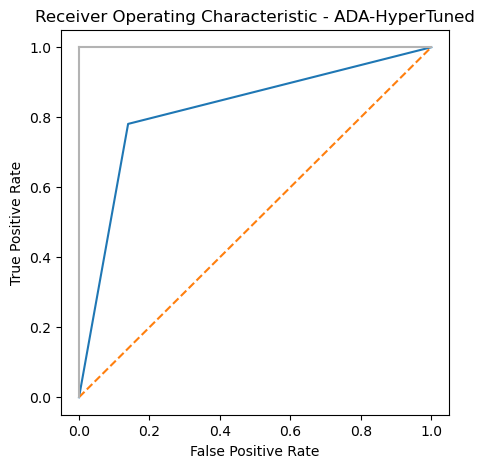

In [248]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - ADA-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [251]:
conclusion = pd.DataFrame({"Actual":y_test,'PREDICTED':testpred})

In [252]:
conclusion

,Actual,PREDICTED
19190,0,0
15840,0,0
3401,0,0
28870,0,0
21325,0,0
...,...,...
6904,0,0
6042,0,0
7229,0,0
19863,0,0


In [254]:
pickle.dump(gs.best_estimator_,open('census.pkl','wb'))